In [118]:
import time
import random
import matplotlib.pyplot as plt
import networkx as nx

# longest path algorithm

In [82]:
def longest_path(graph: list[list[int]]) -> tuple[int, list[int]]:
    path_len = -1
    path_list = None
    for i in range(len(graph)):
        i_path_len, i_path_list = longest_path_recursive(graph, i, [], 0)
        if i_path_len > path_len:
            path_len = i_path_len
            path_list = i_path_list
    return path_len, path_list

def longest_path_recursive(graph: list[list[int]], node, visited: list[int], curr_path_len: int) -> tuple[int, list[int]]:
    path_len = -1
    path_list = None
    visited = visited + [node]
    for i in range(len(graph)):
        if i == node or i in visited or graph[node][i] == 0:
            continue
        i_path_len, i_path_list = longest_path_recursive(graph, i, visited + [i], curr_path_len+graph[node][i])
        if i_path_len > path_len:
            path_len = i_path_len
            path_list = i_path_list
    if path_len == -1:
        return curr_path_len, visited
    return path_len, path_list

In [83]:
def factorial(n) -> int:
    if n in [0, 1]: return 1
    return n * factorial(n-1)

In [153]:
times = []
for i in range(6, 13):
    graph = [[random.randint(1, 3) % 2 for j in range(i)] for k in range(i)]
    start = time.time_ns()
    longest_path_res = longest_path(graph)
    end = time.time_ns()
    times.append((end - start) / 1000)
times

[1152.9, 3186.8, 13700.1, 166268.5, 517580.6, 1372859.8, 35342724.5]

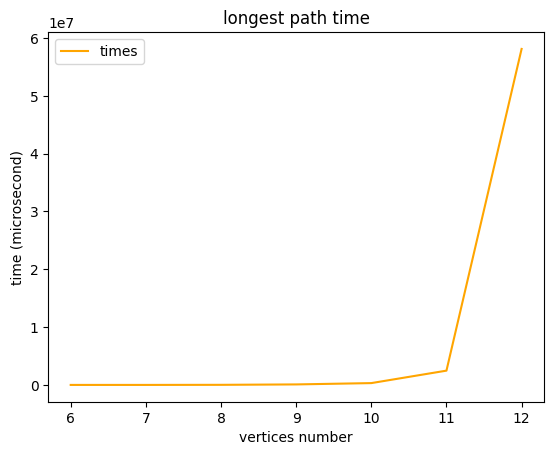

In [91]:
plt.plot(list(range(6, 13)), times,'orange', label='times')
plt.xlabel('vertices number')
plt.ylabel('time (microsecond)')
plt.legend(loc='best')
plt.title('longest path time')
plt.savefig('longest-path-times.png')

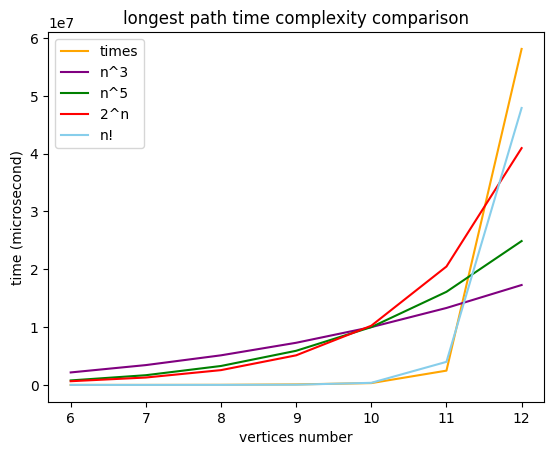

In [101]:
plt.plot(list(range(6, 13)), times, 'orange', label='times')
plt.plot(list(range(6, 13)), [10000 * i**3 for i in range(6, 13)], 'purple', label='n^3')
plt.plot(list(range(6, 13)), [100 * i**5 for i in range(6, 13)], 'green', label='n^5')
plt.plot(list(range(6, 13)), [10000 * 2**i for i in range(6, 13)], 'red', label='2^n')
plt.plot(list(range(6, 13)), [factorial(i)/10 for i in range(6, 13)], 'skyblue', label='n!')
plt.xlabel('vertices number')
plt.ylabel('time (microsecond)')
plt.legend(loc='best')
plt.title('longest path time complexity comparison')
plt.savefig('longest-path-order-comparison.png')

# DAG longest path

### GeeksForGeeks

In [225]:
def topologicalSortUtil(v, V, Stack, visited):
    visited[v] = True
  
    # recursive call for all out-neighbors 
    for i in adj[v]: 
        if (not visited[i[0]]): 
            topologicalSortUtil(i[0], V, Stack, visited) 
  
    # pushing current node to stack (lower layers are on top of the stack)
    Stack.append(v) 
  
# function for finding longest path from each node by topological sort of graph
def longestPathNode(s, V, Stack, visited): 
    # initializing distance
    # setting - inf for every vertice
    dist = [-10**9 for i in range(V)]
    # setting zero for start node
    dist[s] = 0
  
    # go through topological order
    # update value of each node in distance list if it has been seen before
    # if some node is in the topological order before another node, then it has no way to that node
    # because we have DAG and it is without cycle
    while (len(Stack) > 0): 
        
        # get first node of the topological order (node in lower level)
        u = Stack[-1] 
        del Stack[-1] 
  
        # Update distances of all adjacent vertices of that node i we have seen that node before
        # and because we start from s, then only nodes that are after s are counted
        if (dist[u] != -10**9): 
            for i in adj[u]: 
                if (dist[i[0]] < dist[u] + i[1]): 
                    dist[i[0]] = dist[u] + i[1]
    return max(dist)

def longestPath(V):
    # initializing stack (output of the topological oreder) and visited
    Stack, visited = [], [False for _ in range(V)]
    
    # getting topological order of the graph
    for i in range(V): 
        if (visited[i] == False): 
            topologicalSortUtil(i, V, Stack, visited) 
    
    max_path = -1
    for node in range(V):
        node_max_path = longestPathNode(node, V, Stack, visited)
        max_path = max(max_path, node_max_path)
    return max_path

### running algorithm for a sample

In [226]:
V, Stack, visited = 6, [], [False for i in range(7)] 
adj = [[] for i in range(7)] 
  
# creating a graph
adj[0].append([1, 5]) 
adj[0].append([2, 3]) 
adj[1].append([3, 6]) 
adj[1].append([2, 2]) 
adj[2].append([4, 4]) 
adj[2].append([5, 2]) 
adj[2].append([3, 7]) 
adj[3].append([5, 1]) 
adj[3].append([4, -1]) 
adj[4].append([5, -2])

longestPath(V)

15

### converting to networkx graph

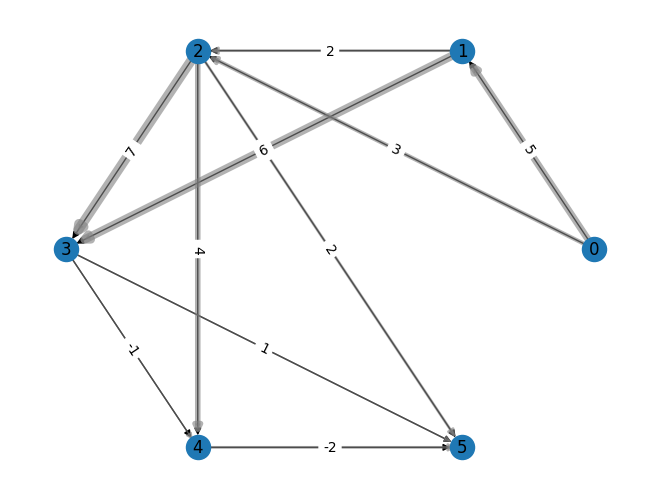

In [227]:
g = nx.DiGraph()
for i in range(V):
    for j, weight in adj[i]:
        g.add_edge(i, j, weight=weight)


pos = nx.circular_layout(g)  # For better example looking
nx.draw(g, pos, with_labels=True)
labels = {e: g.edges[e]['weight'] for e in g.edges}
nx.draw_networkx_edges(g,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='gray',
                       alpha=0.6)
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.show()

In [228]:
times = []
for i in range(10, 2000, 50):
    adj = [[] for _ in range(i)] 
      
    for j in range(i):
        for k in range(j):
            if k == j:
                continue
            adj[j].append([k, random.randint(1, 10)])

    start = time.time_ns()
    longestPath(V=i)
    end = time.time_ns()
    times.append((end - start) / 1000)
times

[0.0,
 995.3,
 1001.6,
 3012.4,
 2464.2,
 0.0,
 15564.3,
 0.0,
 11307.6,
 15621.4,
 19012.8,
 31248.2,
 25765.3,
 31626.7,
 33922.2,
 42760.9,
 36091.9,
 55296.1,
 46887.9,
 62482.9,
 78168.1,
 72398.7,
 78133.0,
 93752.9,
 93749.1,
 109430.2,
 151963.4,
 125024.8,
 124999.7,
 138413.5,
 143093.5,
 156246.1,
 169667.5,
 187496.5,
 187505.0,
 203125.4,
 218740.8,
 250014.9,
 250001.0,
 265623.6]

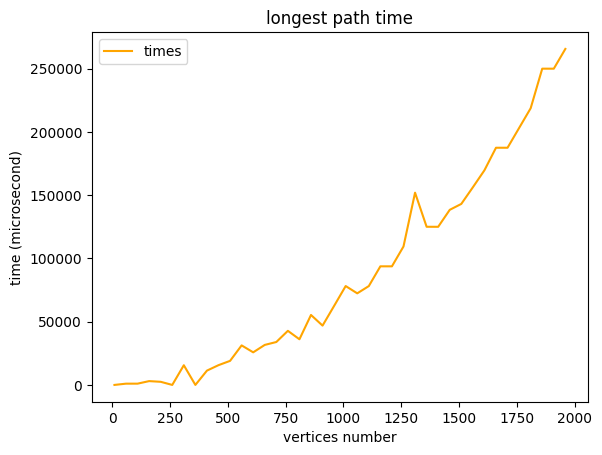

In [229]:
plt.plot(range(10, 2000, 50) , times,'orange', label='times')
plt.xlabel('vertices number')
plt.ylabel('time (microsecond)')
plt.legend(loc='best')
plt.title('longest path time')
plt.savefig('DAG-longest-path-times.png')

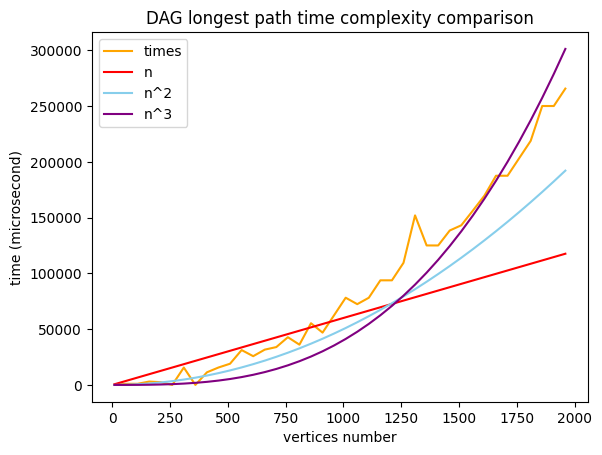

In [230]:
plt.plot(range(10, 2000, 50), times, 'orange', label='times')
plt.plot(range(10, 2000, 50), [60 * i**1 for i in range(10, 2000, 50)], 'red', label='n')
plt.plot(range(10, 2000, 50), [0.05 * i**2 for i in range(10, 2000, 50)], 'skyblue', label='n^2')
plt.plot(range(10, 2000, 50), [0.00004 * i**3 for i in range(10, 2000, 50)], 'purple', label='n^3')
plt.xlabel('vertices number')
plt.ylabel('time (microsecond)')
plt.legend(loc='best')
plt.title('DAG longest path time complexity comparison')
plt.savefig('DAG-longest-path-order-comparison.png')